In [27]:
# using cnn till now 

import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [28]:
DIR=r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images'

In [29]:
train=pd.read_csv(r"/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/train.csv")
test=pd.read_csv(r"/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/test.csv")


In [30]:
train.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]>

In [31]:
test.head

<bound method NDFrame.head of        image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]>

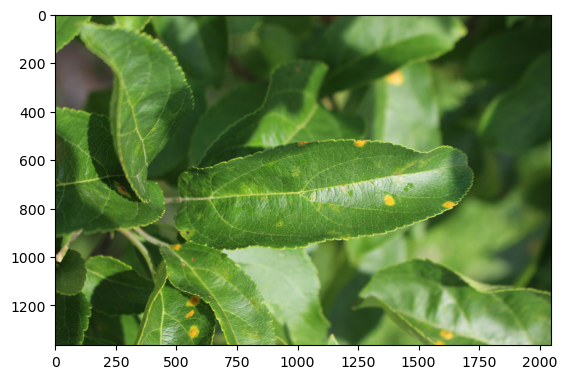

In [32]:
image1=Image.open(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/Test_0.jpg')
plt.imshow(image1)
plt.show()

In [33]:


# preparing the training data


In [34]:
class_names=train.loc[:,'healthy':].columns
print(class_names)


Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [35]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [36]:
train.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab  label
0        Train_0        0                  0     0     1      3
1        Train_1        0                  1     0     0      1
2        Train_2        1                  0     0     0      0
3        Train_3        0                  0     1     0      2
4        Train_4        1                  0     0     0      0
...          ...      ...                ...   ...   ...    ...
1816  Train_1816        0                  0     0     1      3
1817  Train_1817        1                  0     0     0      0
1818  Train_1818        1                  0     0     0      0
1819  Train_1819        0                  0     1     0      2
1820  Train_1820        0                  0     0     1      3

[1821 rows x 6 columns]>

In [37]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [38]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/scab')
                
        elif search("Test",img):
            shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/test')

In [39]:
shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train')
shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/healthy')
shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/multiple_disease')
shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/rust')
shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/scab')

shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/test')

In [40]:
train_dir=create_train_data()

100%|██████████| 3644/3644 [00:07<00:00, 519.97it/s]


In [41]:


# Data Preprocessing


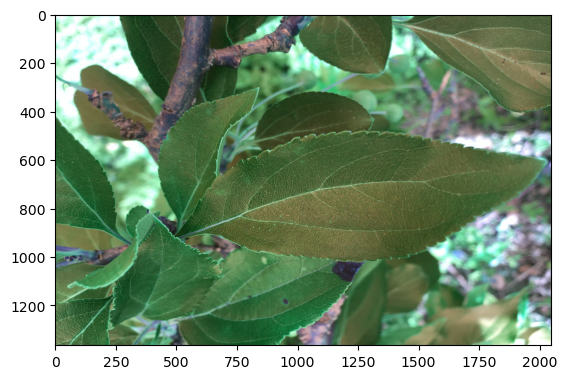

In [42]:
Train_DIR=r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

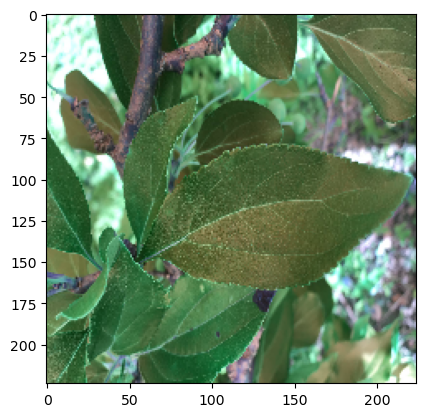

In [43]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [44]:


# Model Prepration


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [46]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [47]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

2022-12-13 15:32:29.919746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
checkpoint=ModelCheckpoint(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [49]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

/var/folders/sc/mn6dzl9d7wlgymnqkz50yrch0000gn/T/ipykernel_85338/1407545075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2722 - accuracy: 0.3148
Epoch 1: val_loss improved from inf to 1.24383, saving model to /Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/apple2.h5
91/91 [==============================] - 190s 2s/step - loss: 1.2722 - accuracy: 0.3148 - val_loss: 1.2438 - val_accuracy: 0.3409
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2482 - accuracy: 0.3294
Epoch 2: val_loss improved from 1.24383 to 1.24022, saving model to /Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/apple2.h5
91/91 [==============================] - 180s 2s/step - loss: 1.2482 - accuracy: 0.3294 - val_loss: 1.2402 - val_accuracy: 0.3295
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2445 - accuracy: 0.3419
Epoch 3: val_loss did not improve from 1.24022
91/91 [==============================] - 179s 2s/step - loss: 1.2445 - accuracy: 0.3419 - val_loss: 1.2403 - val_accuracy: 0.3267
E

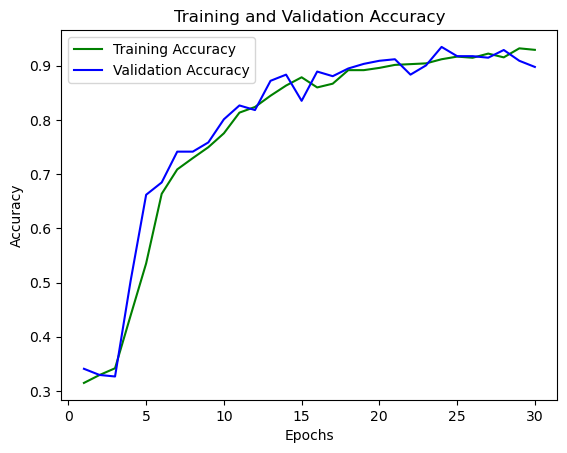

In [50]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


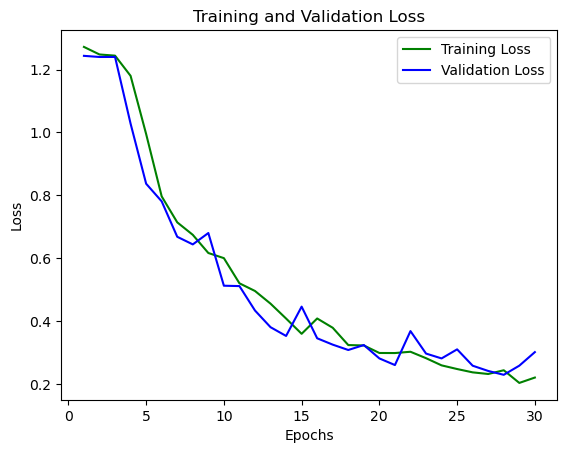

In [51]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:


# Making the Prediction on a Single Image


1/1 [==============================] - 0s 62ms/step
3


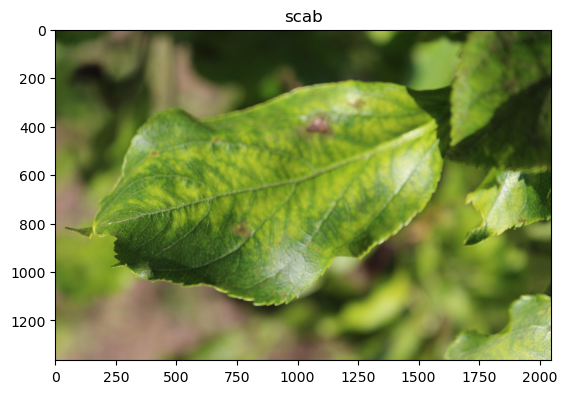

In [55]:
test_image=r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/scab/Train_0.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()
